In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import smogn
import os

In [2]:
path_to_data = os.path.join(os.path.expanduser('~'), "Documents/CatTheory/CO2RR_selectivity_ML/Data/Datasets/BSc")

df = pd.read_csv(path_to_data + '/data', index_col=False)

data = df[['Vnhe', 'H*', 'CO*', 'OCCOH*', 'OH*', 'O*', 'C*', 'CH4']]

target = data[data.columns[-1]].name

In [3]:
df.iloc[:,4:]

,Vnhe,H*,CO*,OCCOH*,OH*,O*,C*,CH4,C2H4,EtOH,PrOH,CO,HCOOH,H2
0,-1.44,0.023236,-0.556853,0.070148,0.856654,0.936462,1.807598,33.3,25.5,5.7,3.00,1.3,9.4,20.5
1,-1.37,0.433729,-0.087450,1.025489,1.280763,2.010691,3.185689,0.0,0.0,0.0,0.00,81.5,0.8,12.4
2,-1.14,0.407140,-0.090951,0.605229,1.977928,2.656480,2.423984,0.0,0.0,0.0,0.00,87.1,0.7,10.2
3,-1.07,-0.225918,-1.430356,-1.688655,0.774783,1.584325,-0.444057,0.0,0.0,0.0,0.00,0.0,0.1,95.7
4,-1.48,0.826178,-0.165051,0.381047,0.352010,0.551014,1.354276,0.0,0.0,0.0,0.00,7.1,88.4,4.6
5,-1.55,0.848249,-0.141406,0.659065,0.171168,0.363054,1.846257,0.0,0.0,0.0,0.00,2.1,94.9,3.3
6,-1.63,0.907909,-0.123199,0.973498,0.386810,1.028115,2.258035,0.0,0.0,0.0,0.00,0.0,97.4,5.0
7,-1.63,0.731254,-0.124407,0.805581,0.949977,0.612106,1.898795,1.3,0.0,0.0,0.00,13.9,78.4,9.4
8,-0.91,-0.459489,-1.669840,-1.884714,-0.229531,-0.862073,-0.629994,0.0,0.0,0.0,0.00,0.0,0.0,94.8
9,-1.54,0.533896,-0.148887,0.250439,0.702620,-0.153392,1.033256,0.0,0.0,0.0,0.00,79.4,6.1,9.9


In [4]:
## conduct smogn
sub_df = smogn.smoter(
    data = data, 
    y = target,
    k = 6,                    ## positive integer (k < n)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    rel_thres = 0.6,         ## positive real number (0 < R < 1)
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
    rel_coef = 0.5
                          ## positive real number (0 < R)
)

dist_matrix: 100%|##########| 9/9 [00:00<00:00, 490.57it/s]


r_index: 100%|##########| 4/4 [00:00<00:00, 489.83it/s]


In [5]:
sub_df

,Vnhe,H*,CO*,OCCOH*,OH*,O*,C*,CH4
0,-1.490985,0.000000,-0.704173,0.000000,0.000000,0.606125,1.072745,37.714286
1,-1.508666,0.000000,-0.693729,0.000000,0.000000,0.590537,1.108713,39.619344
2,-1.381376,0.000000,-0.665099,0.033476,0.000000,0.837138,1.679800,45.836116
3,-1.549497,0.020129,-0.558356,0.102569,0.071345,0.886730,1.735610,46.197031
4,-1.519988,0.128439,-0.637804,0.228873,0.000000,1.069729,0.971180,51.917085
5,-1.420589,0.024272,-0.657658,0.000000,0.000000,0.749494,0.910342,63.019543
6,-1.423435,0.021687,-0.654814,0.000000,0.000000,0.746974,0.872293,94.350000
7,-1.462879,0.021950,-0.670002,0.000000,0.000000,0.698285,0.862099,63.445232
8,-1.520000,0.032304,-0.700933,0.200860,0.026511,0.626988,0.950610,96.000000
9,-1.423392,0.021724,-0.654831,0.000000,0.000000,0.747023,0.872689,94.350000


In [6]:
sub_df.shape

(36, 8)

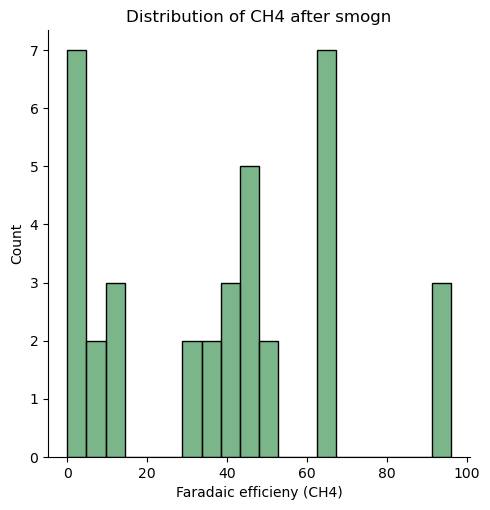

In [7]:
import seaborn as sns

sns.displot(x=sub_df[target], bins=20, color='#4f9e63')
plt.xlabel(f'Faradaic efficieny ({target})')
plt.title(f'Distribution of {target} after smogn')
# path_to_figs = os.path.join(os.path.expanduser('~'), "Dropbox/Apps/Overleaf/bsc_project/graphics/")
#plt.savefig(path_to_figs + f'dist_{target}_w_smogn.pdf', bbox_inches='tight')
plt.show()

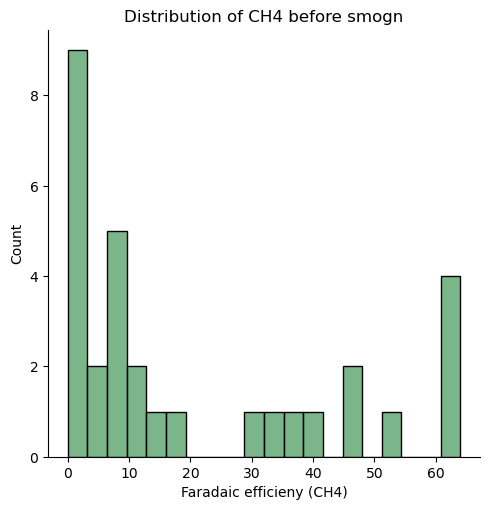

In [8]:
sns.displot(x=data[target], bins=20, color='#4f9e63')
plt.xlabel(f'Faradaic efficieny ({target})')
plt.title(f'Distribution of {target} before smogn')
#path_to_figs = os.path.join(os.path.expanduser('~'), "Dropbox/Apps/Overleaf/bsc_project/graphics/")
# plt.savefig(path_to_figs + f'dist_{target}_wo_smogn.pdf', bbox_inches='tight')
plt.show()

In [9]:
sub_df.to_csv(path_to_data + f"/smogn/smogn_{target}")